<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Details" data-toc-modified-id="Details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Details</a></span></li><li><span><a href="#Example:-Value-at-risk" data-toc-modified-id="Example:-Value-at-risk-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example: Value-at-risk</a></span></li></ul></div>

# Cauchy Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

### Introduction

The Cauchy distribution is a single-peaked distribution with fat tails. The distribution is often used as an example of a "pathological" distribution because both its expected value and its variance are undefined (so are all other higher moments!).

The Cauchy distribution can be used to model processes with a single peak but fat tails. These fat tails are the biggest difference between the Cauchy and the Normal distribution.


### Details

The Cauchy distribution is characterized by two parameters, $x_0$ and $\gamma$. The $x_0$ parameter governs where the peak of the distribution is located while $\gamma$ governs the spread of the distribution.

The Cauchy distribution can take any value along the real line and the probability density function is given by:

\begin{align*}
  f(x; x_0, \gamma) \equiv  \frac{1}{\pi \gamma \left[1 + \left( \frac{x - x_0}{\gamma} \right)^2 \right]}
\end{align*}

The cumulative density function is given by

\begin{align*}
  \Phi(x; x_0, \gamma) \equiv \frac{1}{\pi} \arctan \left(\frac{x - x_0}{\gamma} \right) + \frac{1}{2}
\end{align*}

The mean and variance are undefined, but the median is $x_0$

In [2]:
def cauchy_plot_pdf_cdf(x0, gamma):
    crv = st.cauchy(x0, gamma)
    nrv = st.norm(x0, gamma / 0.667)
    fig, ax = plt.subplots(1, 2, figsize=(14, 10))
    
    xvals = np.linspace(x0-7.5*gamma, x0+7.5*gamma, 10000)
    ax[0].plot(xvals, crv.pdf(xvals))
    ax[0].plot(xvals, nrv.pdf(xvals))
    ax[0].set_title("Probability Density Function")
    
    ax[1].plot(xvals, crv.cdf(xvals))
    ax[1].set_title("Cumulative Distribution Function")
    
    return None

In [3]:
fs1 = FloatSlider(
    value=0, min=-10, max=10,
    step=1, description="location",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

In [4]:
fs2 = FloatSlider(
    value=1, min=1, max=100,
    step=1, description="scale",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

In [5]:
output = interact(cauchy_plot_pdf_cdf, x0=fs1, gamma=fs2)

interactive(children=(FloatSlider(value=0.0, description='location', layout=Layout(width='40%'), max=10.0, min…

### Example: Value-at-risk

Consider two distributions for monthly profits of a given portfolio:

1. A normal distribution with mean 0.75 (millions of USD) and variance 0.30
2. A cauchy distribution with $x_0$ given by 0.75 (millions of USD) and $\gamma$ chosen such that we have the same interquartile range as the normal distribution above.

In [6]:
mean = 0.75
std = np.sqrt(0.30)

crv = st.cauchy(mean, 0.667*std)
nrv = st.norm(mean, std)

In [7]:
# Check the interquartile ranges
print(crv.ppf(np.array([0.25, 0.75])))
print(nrv.ppf(np.array([0.25, 0.75])))

[0.38466905 1.11533095]
[0.38056675 1.11943325]


Value at risk (VaR) for a given portfolio, time-horizon, and probability $p$ is a measure of the "maximum possible loss" after we exclude all of the worst outcomes with a combined probability of at most $p$.

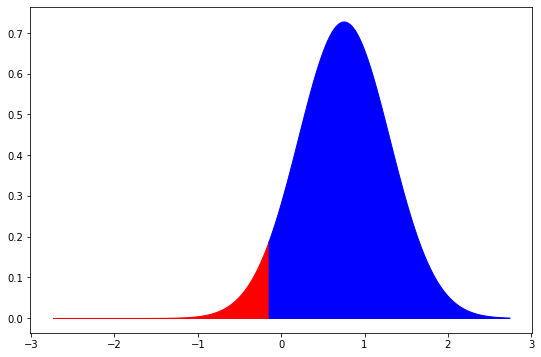

In [8]:
fig, ax = plt.subplots(figsize=(9, 6))

x_VaR = nrv.ppf(0.05)
xvals_left = np.linspace(-5*std, x_VaR, 10_000)
xvals_right = np.linspace(x_VaR, 5*std, 10_000)

ax.fill_between(xvals_left, nrv.pdf(xvals_left), color="r")
ax.fill_between(xvals_right, nrv.pdf(xvals_right), color="b")

One of the big issues with the financial system prior to 2008 (and earlier) was that many VaR models assumed that returns were normal when in reality they had much fatter tails. Let's investigate why this would matter:

In [9]:
VaR_cauchy = crv.ppf(0.05)
VaR_normal = nrv.ppf(0.05)

A normal distribution would predict that our VaR was 150,000, but, if the returns actually followed the Cauchy distribution, then our VaR would be 1.5 million!

This is an order of magnitude difference! Of course, with the Cauchy model, there is significantly more upside as well, but many financial firms agree contractually to certain amounts of risk using VaR as a measure.

In [10]:
VaR_cauchy

-1.556608812755643

In [11]:
VaR_normal

-0.1509234352755091